PT: Esse programa é de caráter educativos, retirados do módulo 4 do curso de Machine Learning da Data Science Academy, com o viés de explorar diferentes formas e modelos de aplicar regressão linear simples e como utiliza-la corretamente para uma boa análise exploratória de dados.

EN: This program has the educational objective, which was taken of the module 4 in the course of Machine Learning of Data Science Academy, with intuitive of explorer diferents models and forms of apply imple Linear Regression and how to use it correctly for a good exploratory data analysis.

In [1]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

First: We can analyze the columns of Dataset Boston Houses
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's

# Trabalhando com Dataset

In [2]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(california.data, columns = california.feature_names)
dataset['target'] = california.target

In [3]:
dataset.head(5) # Exibe somente as 5 primeiras linhas do dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = dataset['target'].mean() # Tira a media de toda a coluna target

In [5]:
valor_medio_esperado_na_previsao

2.0685581690891843

In [6]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que y = média da variável target (valores observados)
# ********* Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos ainda não foram calculados **********
squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['target'])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 27483


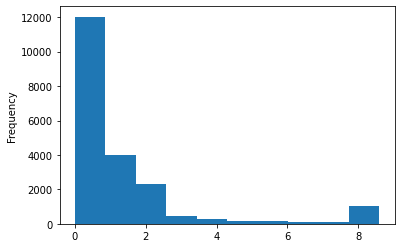

In [7]:
# Histograma dos erros
hist_plot = squared_errors.plot(kind='hist')

In [8]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias, 1)))

In [9]:
# Imprimindo o desvio padrão via fórmula e via NumPy
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(dataset['AveRooms']), np.std(dataset['AveRooms'])))

Resultado da Função: 2.47411 Resultado do Numpy: 2.47411


In [10]:
# Funções para calcular a variância e a correlação
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

In [11]:
# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(dataset['AveRooms'], dataset['target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(dataset['AveRooms'], dataset['target'])[0])

Nossa estimativa de Correlação: 0.15195
Correlação a partir da função pearsonr do SciPy: 0.15195


C:\Users\alexj\AppData\Local\Temp\ipykernel_2560\1188725044.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [12]:
# Definindo o range dos valores de x e y
x_range = [dataset['AveRooms'].min(),dataset['AveRooms'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

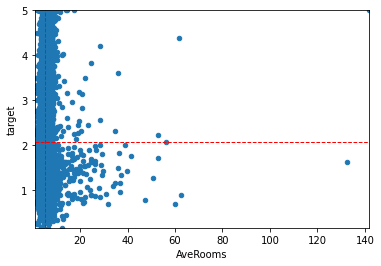

In [13]:
# Plot dos valores de x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'AveRooms', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['AveRooms'].mean(), dataset['AveRooms'].mean()], y_range, '--', color = 'red', linewidth = 1)

### Regressão linear com o StatsModels

In [14]:
# Importando as funções
import statsmodels.api as sm
import statsmodels.formula.api as smf # (simula a criação do modelo em linguagem R )

In [15]:
# Gerando X e Y. Vamos adicionar a constante ao valor de X, gerando uma matrix.
y = dataset['target']
X = dataset['AveRooms']

# Esse comando adiciona os valores dos coefientes à variável X (o bias será calculado internamente pela função)
X = sm.add_constant(X)

In [16]:
X.head()

,const,AveRooms
0,1.0,6.984127
1,1.0,6.238137
2,1.0,8.288136
3,1.0,5.817352
4,1.0,6.281853


In [17]:
# Essa alternativa é muito similar ao código equivalente em linguagem R
modelo_v1 = smf.ols(formula = 'target ~ AveRooms', data = dataset)
modelo_v2 = modelo_v1.fit()

In [18]:
# Criando um modelo Ordinary Least Squares (outra forma de se referir a regressão linear)
modelo_v1 = sm.OLS(y, X)
modelo_v2 = modelo_v1.fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     487.8
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          7.57e-107
Time:                        22:15:16   Log-Likelihood:                -32001.
No. Observations:               20640   AIC:                         6.401e+04
Df Residuals:                   20638   BIC:                         6.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6838      0.019     87.952      0.000       1.646       1.721
AveRooms       0.0709      0.003     22.085      0.000       0.065       0.077
==============================================================================
Omnibus:                     2121.129   Durbin-Watson:                   0.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2849.419
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                       3.606   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Imprimindo os Parâmetros
print (modelo_v2.params)

const       1.683812
AveRooms    0.070869
dtype: float64


In [20]:
# Gerando os valores previstos
valores_previstos = modelo_v2.predict(X)
valores_previstos

0        2.178768
1        2.125901
2        2.271182
3        2.096080
4        2.128999
           ...   
20635    2.041377
20636    2.117106
20637    2.052722
20638    2.061508
20639    2.056207
Length: 20640, dtype: float64

In [21]:
# Fazendo previsões
RM = 5
Xp = np.array([1, RM])
print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modelo_v2.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 2.0


### Gerando um ScatterPlot com a Linha de Regressão

In [22]:
# Range de valores para x e y
x_range = [dataset['AveRooms'].min(),dataset['AveRooms'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

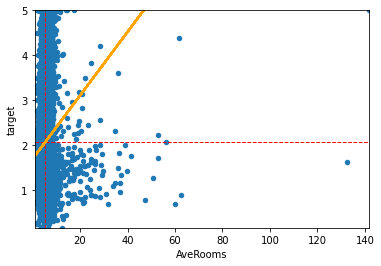

In [23]:
# Primeira camada do Scatter Plot
scatter_plot = dataset.plot(kind = 'scatter', x = 'AveRooms', y = 'target', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['AveRooms'].mean(),dataset['AveRooms'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dataset['AveRooms'], valores_previstos, '-', color = 'orange', linewidth = 2)

In [24]:
# Comparação entre a função predict() e a função dot()
coeficientes = np.array(modelo_v2.params)
previsoes_dot = np.dot(X, coeficientes)
print ("Usando a função predict(): %s" % valores_previstos[:10])
print ("Usando coeficientes e função dot: %s" % previsoes_dot[:10])

Usando a função predict(): 0    2.178768
1    2.125901
2    2.271182
3    2.096080
4    2.128999
5    2.021264
6    2.033330
7    2.023806
8    1.988130
9    2.036071
dtype: float64
Usando coeficientes e função dot: [2.17876816 2.12590076 2.27118168 2.0960802  2.12899887 2.02126447
 2.03332978 2.02380646 1.98813044 2.0360711 ]


In [25]:
# Gerando os resíduos
residuos = dataset['target'] - valores_previstos
residuos_normalizados = standardize(residuos)

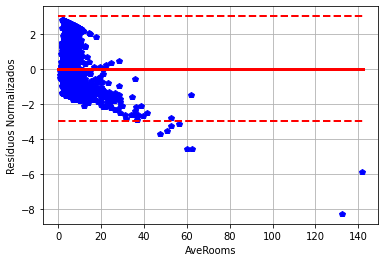

In [26]:
# ScatterPlot dos resíduos
residual_scatter_plot = plt.plot(dataset['AveRooms'], residuos_normalizados,'bp')
plt.xlabel('AveRooms') 
plt.ylabel('Resíduos Normalizados') 
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

## Regressão Linear com Scikit-Learn

In [27]:
from sklearn import linear_model

In [28]:
# Cria o objeto
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [29]:
# Define os valores de x e y
num_observ = len(dataset)
X = dataset['AveRooms'].values.reshape((num_observ, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = dataset['target'].values # y pode ser um vetor

In [30]:
# Aplica o modelo - fit()
modelo.fit(X,y)

C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [31]:
# Imprime os coeficientes
print (modelo.coef_)
print (modelo.intercept_)

[0.07086879]
1.683811508640482


In [32]:
# Imprime as previsões
print (modelo.predict(X)[:10])

[2.17876816 2.12590076 2.27118168 2.0960802  2.12899887 2.02126447
 2.03332978 2.02380646 1.98813044 2.0360711 ]


### Comparação StatsModels x ScikitLearn

In [33]:
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples = 10000000, n_features = 1, n_targets = 1, random_state = 101)

In [34]:
%%time
sk_linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
sk_linear_regression.fit(HX,Hy)

C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


CPU times: total: 656 ms
Wall time: 504 ms


LinearRegression(normalize=False)

In [35]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: total: 3.33 s
Wall time: 966 ms


## Cost Function de um Modelo de Regressão Linear

In [36]:
# Definindo 2 conjuntos de dados
import numpy as np
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])

In [37]:
# Função para cálculo da Cost Function
def squared_cost(v, e):
 return np.sum((v - e) ** 2)

In [38]:
# A função fmin() tenta descobrir o valor do somatório mínimo dos quadrados
from scipy.optimize import fmin
xopt = fmin(squared_cost, x0 = 0, xtol = 1e-8, args = (x,))

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [39]:
print ('Resultado da Otimização: %0.1f' % (xopt[0]))
print ('Média: %0.1f' % (np.mean(x)))
print ('Mediana: %0.1f' % (np.median(x)))

Resultado da Otimização: 7.8
Média: 7.8
Mediana: 8.0


In [40]:
def absolute_cost(v,e):
 return np.sum(np.abs(v - e))

In [41]:
xopt = fmin(absolute_cost, x0 = 0, xtol = 1e-8, args = (x,))

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


In [42]:
print ('Resultado da Otimização: %0.1f' % (xopt[0]))
print ('Média %0.1f' % (np.mean(x)))
print ('Mediana %0.1f' % (np.median(x)))

Resultado da Otimização: 8.0
Média 7.8
Mediana 8.0


## Minimizando a Cost Function 

Minimizando a Cost Function com Pseudo-Inversão

In [43]:
# Definindo x e y
num_observ = len(dataset)
X  = dataset['AveRooms'].values.reshape((num_observ, 1)) # X deve ser uma matriz
Xb = np.column_stack((X, np.ones(num_observ)))
y  = dataset['target'].values # y pode ser um vetor

In [44]:
# Funções para matriz inversa e equações normais
def matriz_inversa(X, y, pseudo = False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T,y))
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T,y))

def normal_equations(X,y):
    return np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

In [45]:
# Imprime os valores
print (matriz_inversa(Xb, y))
print (matriz_inversa(Xb, y, pseudo = True))
print (normal_equations(Xb, y))

[0.07086879 1.68381151]
[0.07086879 1.68381151]
[0.07086879 1.68381151]


## Aplicando o Gradient Descent

In [46]:
# Definindo x e y
observations = len(dataset)
X = dataset['AveRooms'].values.reshape((observations,1)) 
X = np.column_stack((X,np.ones(observations))) 
y = dataset['target'].values 

In [47]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path

In [48]:
# Definindo o valor de alfa
# Alfa é chamado de taxa de aprendizagem
alpha = 0.048

# Otimizando a Cost Function
w, path = optimize(X, y, alpha, eta = 10**-12, iterations = 25000)

In [49]:
# Imprimindo o resultado
print ("Valor Final dos Coeficientes: %s" % w)

Valor Final dos Coeficientes: [0.07086884221905837, 1.6838111892886314]


In [50]:
# Imprimindo o resultado
print ("Percorrendo o Caminho do Gradiente em que o erro ao quadrado era %s" % path)

Percorrendo o Caminho do Gradiente em que o erro ao quadrado era [68051.56758927666, 26848.658382158763, 26848.65834277156]
